In [1]:
import os
import sys
import glob
import imghdr
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


In [2]:


def change_format_image(path, image_original = None, image_result=None):
    """
    path: root directory
    image_original: format of input image
    image_result: format of output image
    """
    if not os.path.isdir(path):
        raise Exception("Invalid directory")
        
    # New Directory  
    directory = "OutputFile/"
    new_path = os.path.join(path, directory)
    
    for root, dirs, files in os.walk(path, topdown=False):
        for name in files:
            
            if imghdr.what(name) == str(image_original).lower():
                if (os.path.splitext(os.path.join(root, name))[0]
                    + image_result):
                    
                    try:
                        # if not exist
                        if not os.path.isdir(new_path):
                            os.mkdir(new_path)
                            
                        original = path + name
                        
                        print("original: ", original)
                        outfile = os.path.splitext(os.path.join(new_path, name))[0]
                        + '.' + image_result.lower()
                        
                        Image.open(original).convert('RGB').save(outfile)
                    
                    except Exception:
                        raise ("An error has ocurred when trying save the image to new format")
                        

In [7]:

FINAL_PATH_LABELED = 'C:/Users/virus/Downloads/CK+/cohn-kanade-images-labeled/'
FINAL_PATH_UNLABELED = 'C:/Users/virus/Downloads/CK+/cohn-kanade-images-unlabeled/'


    
    
def get_folder(string1, string2):
    
    if string1 == string2:
        return None
        
    if  len(string1) < len(string2):
        return string2[len(string1):]
    
    else:
        return string1[len(string2):]

    
# save images with label
def save_with_label(path_images, inner_folder, emotion):
    
   
    #if not os.path.isdir(final_path):
    #    os.mkdir(final_path)
        

    total_images = os.listdir(path_images)
    
    for image in total_images:
        dir_images = os.path.join(path_images, image)
        
        ###########print(dir_images, image)
        
        final_dir = FINAL_PATH + inner_folder + '/' + emotion + '/' + image
        create = FINAL_PATH + inner_folder + '/' + emotion + '/'
        
        
            
        if not os.path.isdir(FINAL_PATH + inner_folder + '/'):
            os.mkdir(FINAL_PATH + inner_folder + '/')
            
        if not os.path.isdir(create):
            os.mkdir(create)
        
        Image.open(dir_images).convert('L').save(final_dir)
    
    
    
def save_without_label(get_image, final_dir):
    
    total_images = os.listdir(get_image)
    
    for image in total_images:
        dir_images = os.path.join(get_image, image)
        save_it =  final_dir + image
        
        #########print('read: ', dir_images)
        #########print('save in: ', save_it)
        Image.open(dir_images).convert('L').save(save_it)
        
    print('\n')
    
    
def get_label(file_path):
    
    # 0=neutral, 1=anger, 2=contempt, 3=disgust, 4=fear, 5=happy, 6=sadness,
    #7=surprise).
    
    emotions = {0:'neutral',
               1:'anger',
               2:'contempt',
               3:'disgust',
               4:'fear',
               5:'happy',
               6:'sadness',
               7:'surprise'}
    
    
    file1 = open(file_path,"r") 
    
    value = file1.readlines()[0].strip()
    value = int(value.strip("\n")[0])
    file1.close()
    
    return emotions[value]
    
    

    
    
def folders_inner(path, inner_folder, images_folder):
    
    if not os.path.isdir(path):
        raise Exception("Invalid directory")
      
    
    
    for root, dirs, files in os.walk(path, topdown=False):
        
        if dirs:
            for folder in dirs:
                
                folder_n = path + '/' + folder
                
                total_images = len(list(os.listdir(folder_n)))
                new_file = images_folder + '/'+ folder + '/'
                
                # with label
                if total_images > 0:
                    
                    
                    images = list(os.listdir(folder_n))
                    file_emotion = os.listdir(folder_n)[0]
                    
                    final_path_emotion = folder_n + '/' + file_emotion
                    emotion = get_label(final_path_emotion)
                    
                    
                    
                    # save in a new folder
                    save_with_label(new_file, inner_folder, emotion)
                    
                    
                # wihout label              
                else:
                    
                    final_saved = FINAL_PATH_UNLABELED  + inner_folder + '/' + folder + '/'
                    
                    
                    get_image = images_folder + '/' + folder + '/'

                    
                    if not os.path.isdir(FINAL_PATH_UNLABELED  + inner_folder + '/'):
                        os.mkdir(FINAL_PATH_UNLABELED  + inner_folder + '/')
                        
                    if not os.path.isdir(final_saved):
                        os.mkdir(final_saved)
                        
                    # save images without label
                    save_without_label(get_image, final_saved)
                    
            
    
    
def face_alingment(path, images_path):
    
    if not os.path.isdir(path):
        raise Exception("Invalid directory")
    
    
    if not os.path.isdir(FINAL_PATH_LABELED):
        os.mkdir(FINAL_PATH_LABELED)
    
    
    if not os.path.isdir(FINAL_PATH_UNLABELED):
        os.mkdir(FINAL_PATH_UNLABELED)
    
    # training Directory  
    training = "training/"
    training_path = os.path.join('C:/Users/virus/source/repos/DATASETS/', training)
    
    
    for root, dirs, files in os.walk(path, topdown=False):
        
        inner_folder = get_folder(root, path)
        folder = root[:-4]
        
        if folder.endswith('/'):
            
            new_file = folder+inner_folder
            images_folder = images_path+inner_folder
            
            
            # read all images
            folders_inner(new_file, inner_folder, images_folder)
            
            
            
        

In [9]:
emotions_path = 'C:/Users/virus/Downloads/CK+/Emotion/'
images_path = 'C:/Users/virus/Downloads/CK+/cohn-kanade-images/'


#face_alingment(emotions_path, images_path)



In [401]:
list(os.listdir('C:/Users/virus/Downloads/CK+/cohn-kanade-images/S010/001'))

['S010_001_00000001.png',
 'S010_001_00000002.png',
 'S010_001_00000003.png',
 'S010_001_00000004.png',
 'S010_001_00000005.png',
 'S010_001_00000006.png',
 'S010_001_00000007.png',
 'S010_001_00000008.png',
 'S010_001_00000009.png',
 'S010_001_00000010.png',
 'S010_001_00000011.png',
 'S010_001_00000012.png',
 'S010_001_00000013.png',
 'S010_001_00000014.png']

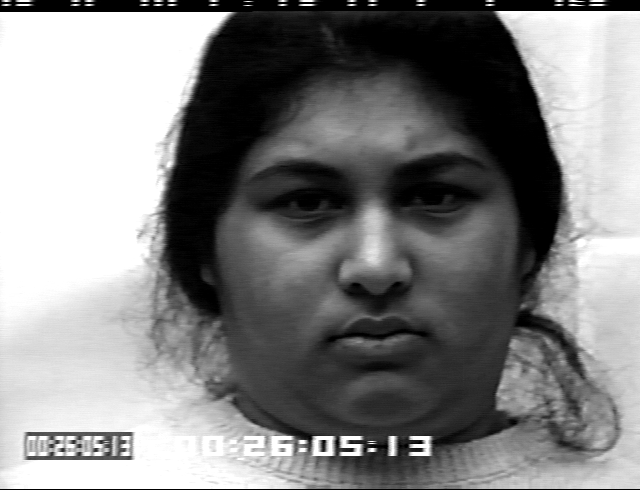

In [277]:
img = Image.open(dir_images).convert('L')
img

In [271]:

I = np.asarray(img)
I.shape

(490, 640)

In [241]:
import os
import numpy as np
import shutil
import random


# # Creating Train / Val / Test folders (One time use)
root_dir = 'C:/Users/virus/Downloads/CK+/filtered'
classes_dir = ['/anger', '/contempt', '/disgust', '/fear', '/happy', '/neutral', '/sadness', '/surprise']

#val_ratio = 0.15
test_ratio = 0.20

for cls in classes_dir:
    os.makedirs(root_dir +'/train' + cls)
    ###############os.makedirs(root_dir +'/val' + cls)
    os.makedirs(root_dir +'/test' + cls)


    # Creating partitions of the data after shuffeling
    src = root_dir + cls # Folder to copy images from

    allFileNames = os.listdir(src)
    np.random.shuffle(allFileNames)
    
    ################# train_FileNames, val_FileNames, test_FileNames = np.split....
    train_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                              #[int(len(allFileNames)*(1 - val_ratio + test_ratio)), 
                                                               [int(len(allFileNames)*(1 - test_ratio))])


    train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]
    #################val_FileNames = [src+'/' + name for name in val_FileNames.tolist()]
    test_FileNames = [src+'/' + name for name in test_FileNames.tolist()]

    print('Total images: ', len(allFileNames))
    print('Training: ', len(train_FileNames))
    #################print('Validation: ', len(val_FileNames))
    print('Testing: ', len(test_FileNames))
    print("\n\n")
    # Copy-pasting images
    for name in train_FileNames:
        shutil.copy(name, root_dir +'/train' + cls)
    
    #################for name in val_FileNames:
        #################shutil.copy(name, root_dir +'/val' + cls)

    for name in test_FileNames:
        shutil.copy(name, root_dir +'/test' + cls)

Total images:  44
Training:  35
Testing:  9



Total images:  17
Training:  13
Testing:  4



Total images:  59
Training:  47
Testing:  12



Total images:  24
Training:  19
Testing:  5



Total images:  69
Training:  55
Testing:  14



Total images:  116
Training:  92
Testing:  24



Total images:  27
Training:  21
Testing:  6



Total images:  83
Training:  66
Testing:  17





# DATA NORMALIZATION | z-score

In [6]:
import numpy as np
from PIL import Image
from numpy import asarray
from scipy import stats

def mean_std_by(image):
    
    image = Image.open(image)
    pixels = asarray(image)
    
    mean = np.mean(pixels.flatten(), dtype=np.float64)
    std = np.std(pixels.flatten(), dtype=np.float64)
    
    return mean, std
    
def read_images(path):

    if not os.path.isdir(path):
        raise Exception("Invalid directory...")
        
    
    directory = "Histogram/"
    new_path = os.path.join(path, directory)
    
    means = []
    stds = []
    
    for root, dirs, files in os.walk(path, topdown=False):

        for i, name in enumerate(files, 1):
            original = os.path.join(root, name)

            mean, std = mean_std_by(original)
            means.append(mean)
            stds.append(std)
            if i % 100 == 0:
                print("computing std, mean...left {}".format(len(files) - i))
            
    mean_gral = np.mean(np.asarray(means))
    std_gral = np.std(np.asarray(stds))
    
    return mean_gral, std_gral
    
    
    
def zscore(origin, final, mean, std):
    
    image = Image.open(origin)
    pixels = asarray(image)

    pixels = (pixels - mean) /  std
    
    im = Image.fromarray(np.float64(pixels))

    im.convert('L').save(final)
    
    
def zscore_normalization(path):
    
    
    if not os.path.isdir(path):
        raise Exception("Invalid directory")
    
    
    # New Directory  
    directory = "ZscoreOutput/"
    new_path = os.path.join(path, directory)
    
    if not os.path.isdir(new_path):
        os.mkdir(new_path)
    
    # compute mean and std for all images
    mean, std = read_images(path)
    print("")
    print("mean gral: {}\nstd gral: {}".format(mean, std))
    print("")
    
    for root, dirs, files in os.walk(path, topdown=False):

        for i, file in enumerate(files):
            original = os.path.join(root, file)
            
            new_folder = os.path.join(new_path, file)
            
            zscore(original, new_folder, mean, std)
            if i%100 == 0:
                print("z score nomalization, left...{}".format(len(files) - i))

    print("finished...")
    
if __name__ == '__main__':
    # folder with all images
    dir_image = 'C:/Users/virus/source/repos/DATASETS/CK+/Histogram/'
    
    # apply zscore normalization after histogram equalization was applied
    ###############zscore_normalization(dir_image)
    
    
    
    
    
    

In [28]:


#mean gral: 117.9951938948301
#std gral: 9.114636153038024




#mean gral: 113.84889976249121
#std gral: 8.53443628163184



# histogram
# 126.28778215950788
# 2.6452071285228773

In [15]:
  
def zscore(origin, final):
    
    image = Image.open(origin)
    pixels = asarray(image)

    print(pixels)
    print('dim image: {}'.format(pixels.shape))
    print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))

    pixels = (pixels - 126.28778215950788) /  2.6452071285228773#- 113.84889976249121

    #pixels = pixels / 2.6452071285228773 #/ 8.53443
    print("\n\n")
    print(pixels)
    im = Image.fromarray(np.float64(pixels))

    im.convert('L').save(final)



In [17]:

origin = 'C:/Users/virus/source/repos/DATASETS/PRUEBA/79.png'
final = 'C:/Users/virus/source/repos/DATASETS/PRUEBA/79_zscore.png'

zscore(origin, final)

[[117 209 224 ...   0   0   0]
 [ 72 202 224 ...   0   0   0]
 [  0   4   9 ...   0   0   0]
 ...
 [ 48  48  47 ... 233 238 245]
 [ 43  44  46 ... 226 237 243]
 [  0   0   4 ...   0   0  12]]
dim image: (490, 640)
Min: 0.000, Max: 255.000



[[ -3.51117387  31.26871123  36.93934467 ... -47.74211471 -47.74211471
  -47.74211471]
 [-20.52307419  28.62241562  36.93934467 ... -47.74211471 -47.74211471
  -47.74211471]
 [-47.74211471 -46.22994579 -44.33973464 ... -47.74211471 -47.74211471
  -47.74211471]
 ...
 [-29.5960877  -29.5960877  -29.97412993 ...  40.34172473  42.23193588
   44.87823149]
 [-31.48629885 -31.10825662 -30.35217216 ...  37.69542913  41.85389365
   44.12214703]
 [-47.74211471 -47.74211471 -46.22994579 ... -47.74211471 -47.74211471
  -43.20560796]]


In [60]:
points_68 = [(163, 232),
             (168, 258),
             (175, 282),
             (182, 307),
             (191, 329),
             (205, 349),
             (223, 366),
             (244, 379),
             (269, 383),
             (293, 377),
             (315, 364),
             (336, 346),
             (351, 323),
             (358, 298),
             (361, 271),
             (363, 244),
             (362, 217),
             (176, 217),
             (184, 201),
             (201, 195),
             (219, 195),
             (235, 203),
             (268, 203),
             (285, 194),
             (304, 190),
             (324, 194),
             (337, 208),
             (253, 226),
             (255, 244),
             (255, 262),
             (257, 280),
             (241, 292),
             (250, 296),
             (259, 298),
             (269, 295),
             (278, 290),
             (199, 235),
             (209, 229),
             (221, 228),
             (234, 235),
             (222, 238),
             (209, 239),
             (281, 232),
             (292, 224),
             (305, 223),
             (316, 228),
             (306, 233),
             (294, 234),
             (231, 319),
             (243, 317),
             (254, 315),
             (262, 317),
             (271, 314),
             (284, 315),
             (299, 315),
             (285, 330),
             (274, 336),
             (265, 337),
             (256, 335),
             (244, 330),
             (237, 320),
             (254, 321),
             (263, 322),
             (272, 321),
             (293, 318),
             (272, 323),
             (263, 325),
             (255, 323)]

points = [(199, 235), # 36
          (209, 229), # 37
          (221, 228), # 38
          (234, 235), # 39
          (222, 238), # 40
          (209, 239), # 41
          (281, 232), # 42
          (292, 224), # 43
          (305, 223), # 44
          (316, 228), # 45
          (306, 233), # 46
          (294, 234)] # 47


#           (x , y)
left = [  (199, 235), # 36
          (209, 229), # 37
          (221, 228), # 38
          (234, 235), # 39
          (222, 238), # 40
          (209, 239)] # 41

#           (x , y)
right = [ (281, 232), # 42
          (292, 224), # 43
          (305, 223), # 44
          (316, 228), # 45
          (306, 233), # 46
          (294, 234)] # 47

In [61]:
val = np.asarray(points)
x = val[0:6]
y = val[6:]

In [62]:
x

array([[199, 235],
       [209, 229],
       [221, 228],
       [234, 235],
       [222, 238],
       [209, 239]])

In [63]:
y

array([[281, 232],
       [292, 224],
       [305, 223],
       [316, 228],
       [306, 233],
       [294, 234]])

In [84]:
np.sum(y[:,1])

1374

In [72]:
import math 


def compute_distance(points):
    
    # as array, much more fast
    points = np.asarray(points)
    
    # select eye right and left
    left = points[0:6] # points(x,y), 36 to 41
    right = points[6:] # points(x,y), 42 to 47
    
    sum_x = np.sum(right[:,0])
    sum_y = np.sum(left[:,0])
    
    d = (sum_x - sum_y) / 6
    return d
    


def compute_angle(points):
    
    # as array, much more fast
    points = np.asarray(points)
    
    # select eye right and left
    left = points[0:6] # points 36 to 41
    right = points[6:] # points 42 to 47
    
    # compute numerator
    asum_x = np.sum(right[:,1]) # points 42 to 47 => 'y'
    asum_y = np.sum(left[:,1])  # points 36 to 41 => 'y'
    
    numerador = asum_x - asum_y
    
    # compute denominator
    asum2_x = np.sum(right[:,0]) # points 42 to 47 => 'x'
    asum2_y = np.sum(left[:,0])  # points 36 to 41 => 'x'
    
    denominador = asum2_x - asum2_y
    
    # compute angle=arctan(x)
    angle = np.degrees(np.arctan(numerador / denominador))
    
    ########################################
    ########################################
    ########################################
    #sum_x = sum([cord[1] for cord in right])
    #sum_y = sum([cord[1] for cord in left])
    
    #numerador = sum_x - sum_y
    
    #sum2_x = sum([cord[0] for cord in right])
    #sum2_y = sum([cord[0] for cord in left])
    
    #denominador = sum2_x - sum2_y
    
    #angle = math.atan(numerador / denominador)
    
    return angle


# angle2 = -0.05992815512120788 original

In [73]:
compute_angle(points)

-3.433630362450522

In [74]:
compute_distance(points)

83.33333333333333

In [85]:
from PIL import Image, ImageDraw


im = Image.open("C:/Users/virus/source/repos/DATASETS/PRUEBA/landmarck/rotate1.png").convert('RGB')
draw = ImageDraw.Draw(im)

draw.point(points_68, fill='red')

im.show()

In [81]:
# import the Python Image processing Library
from PIL import Image

# Create an Image object from an Image
colorImage  = Image.open("C:/Users/virus/source/repos/DATASETS/PRUEBA/landmarck/rotate1.png")
 
# Rotate it by 45 degrees
rotated = colorImage.rotate(3.433630362450522)

# Display the Original Image
#colorImage.show()

####rotated.convert('L').save("C:/Users/virus/source/repos/DATASETS/PRUEBA/landmarck/rotate11.png")
# Display the Image rotated by 45 degrees

rotated.show()

In [41]:
np.degrees(-0.05992815512120788)

-3.433630362450522

# Downsampling


In [4]:
PATH = 'C:/Users/virus/source/repos/DATASETS/PRUEBA/landmarck/Rotations/CroppedImages/rotate1.png'

img = Image.open(PATH)
img.load()
img_array = np.asarray(img, dtype='int32')


In [5]:
img_array.shape

(210, 198)

In [6]:
img_array.min()

0

In [7]:
img_array.max()

255

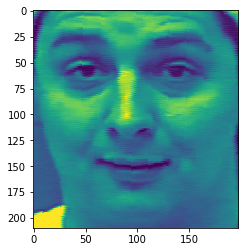

In [25]:
red1 = np.copy(img_array)
red1[:,0] = 255 # this is on (top row below)
plt.imshow(red1)


In [27]:
downsample = 20
# first, change to 0-1
ds_array = img_array/255

In [39]:
from skimage.transform import resize

resized = resize(img_array, (32, 32))


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [41]:
img = Image.fromarray(resized, 'L')
img.show()

In [52]:
def process_image(image):
    "Processes the image"
    image = image.resize((32, 32), Image.ANTIALIAS) # or whatever you are doing to the image
    return image


path = 'C:/Users/virus/source/repos/DATASETS/PRUEBA/landmarck/Rotations/CroppedImages/rotate4.png'
image = Image.open(path)
proc_image = process_image(image)
proc_image.save('C:/Users/virus/source/repos/DATASETS/PRUEBA/landmarck/Rotations/CroppedImages/out4.png')

# counting images

In [195]:
def count_images(path):

    if not os.path.isdir(path):
        raise Exception("Invalid directory...")
        
    
    directory = "Histogram/"
    new_path = os.path.join(path, directory)
    
    means = []
    stds = []
    val = 0
    for root, dirs, files in os.walk(path, topdown=False):
        
        for i, name in enumerate(files, 1):
            
            val += 1
    print(val)

In [246]:

count_images('C:/Users/virus/Downloads/CK+/train/')

348


In [247]:
total = 439
test = 91
train = 348

test + train

439

# Split dataset labeled

In [237]:
import os
import numpy as np
import shutil
import random


# # Creating Train / Val / Test folders (One time use)
root_dir = 'C:/Users/virus/Downloads/CK+/filtered/'
classes_dir = ['/disgusto', '/enojo', '/felicidad', '/miedo', '/neutral', '/sorpresa', '/tristeza']



def split_folder(path):
    
    if not os.path.isdir(root_dir):
        os.makedirs(root_dir)
    
    for root, dirs, files in os.walk(path, topdown=False):
        
        if dirs:
            
            for i, folder in enumerate(dirs, 1):
                
                images_by_folder = root + '/' + folder
                total_images = len(list(os.listdir(images_by_folder)))
                   
                # get the first image neutral by folder
                
                
                    
                
                if total_images > 0:
                    
                    images = os.listdir(images_by_folder)
                    
                    first_image = images[0]   # neutral
                    last_images = images[-1]  # last three emotions corresponds
                    if i == 1:
                        read_first = root + '/' + folder + '/' + first_image
                        save_first = root_dir + '/neutral'
                        save_first_image = root_dir + '/neutral' + '/' +first_image

                        if not os.path.isdir(save_first):
                            os.makedirs(save_first)

                        # read and save the first image
                        Image.open(read_first).convert('L').save(save_first_image)
                    
                    ##########################################
                    
                    
                    read_last = root + '/' + folder + '/' + last_images
                    save_last = root_dir + folder
                    save_last_image = root_dir + folder + '/' + last_images
                    
                    if not os.path.isdir(save_last):
                        os.makedirs(save_last)
                        
                    # read and save the last image
                    Image.open(read_last).convert('L').save(save_last_image)
                    
        
        

In [239]:
path_labeled = 'C:/Users/virus/Downloads/CK+/cohn-kanade-images-labeled/'

#split_folder(path_labeled)
